# Example 4: Decision trees

The goal of this tutorial is to get familiar with the use of *tree-based methods*, more particularly with classification and regression trees (CART). The first example is an application of a classification tree on 'iris' data, available in the `datasets` module of the scikit-learn library. The second example is an application of a regression tree on the data 'Hitters'.

For this tutorial, we will need the following libraries:

In [1]:
from matplotlib import pyplot as plt # vizualisation
from sklearn import datasets # datasets available in scikit-learn
from sklearn.tree import DecisionTreeClassifier # classification trees
from sklearn.tree import DecisionTreeRegressor # regression trees
from sklearn.preprocessing import OneHotEncoder # one-hot encoding (in french: "codage disjonctif complet")
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import mean_squared_error # MSE
from sklearn.model_selection import cross_val_score # CV
from sklearn.model_selection import GridSearchCV # grid search CV ("tuning")
from sklearn import tree
import pandas as pd
import numpy as np

## 1) Classification trees (visualizing the tree)

We start by loading the 'iris' data, with the `load_iris()` function contained in the `datasets` module.
This is a well known classification problem (three classes to predict).
The goal here is to display the obtained decision tree (we will not try to optimize the hyperparameters).

In [22]:
# load data
iris = datasets.load_iris()

# store predictors in X
X = iris.data

# target y
y = iris.target

# create a classification tree model (default hyperparameters)
tree_class = DecisionTreeClassifier(random_state=1234)

# fitting the model using X and y (similar to previous models)
tree_class.fit(X, y)

DecisionTreeClassifier(random_state=1234)

In [23]:
iris.keys()

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


A basic visualization of the decision tree, in a textual form, can be obtained with the `export_tree` function of the scikit-learn library. But the rendering is not readable.

In [24]:
text_representation = tree.export_text(tree_class)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



We can visualize the decision tree directly in the notebook via the function `plot_tree()` of the matplotlib library.

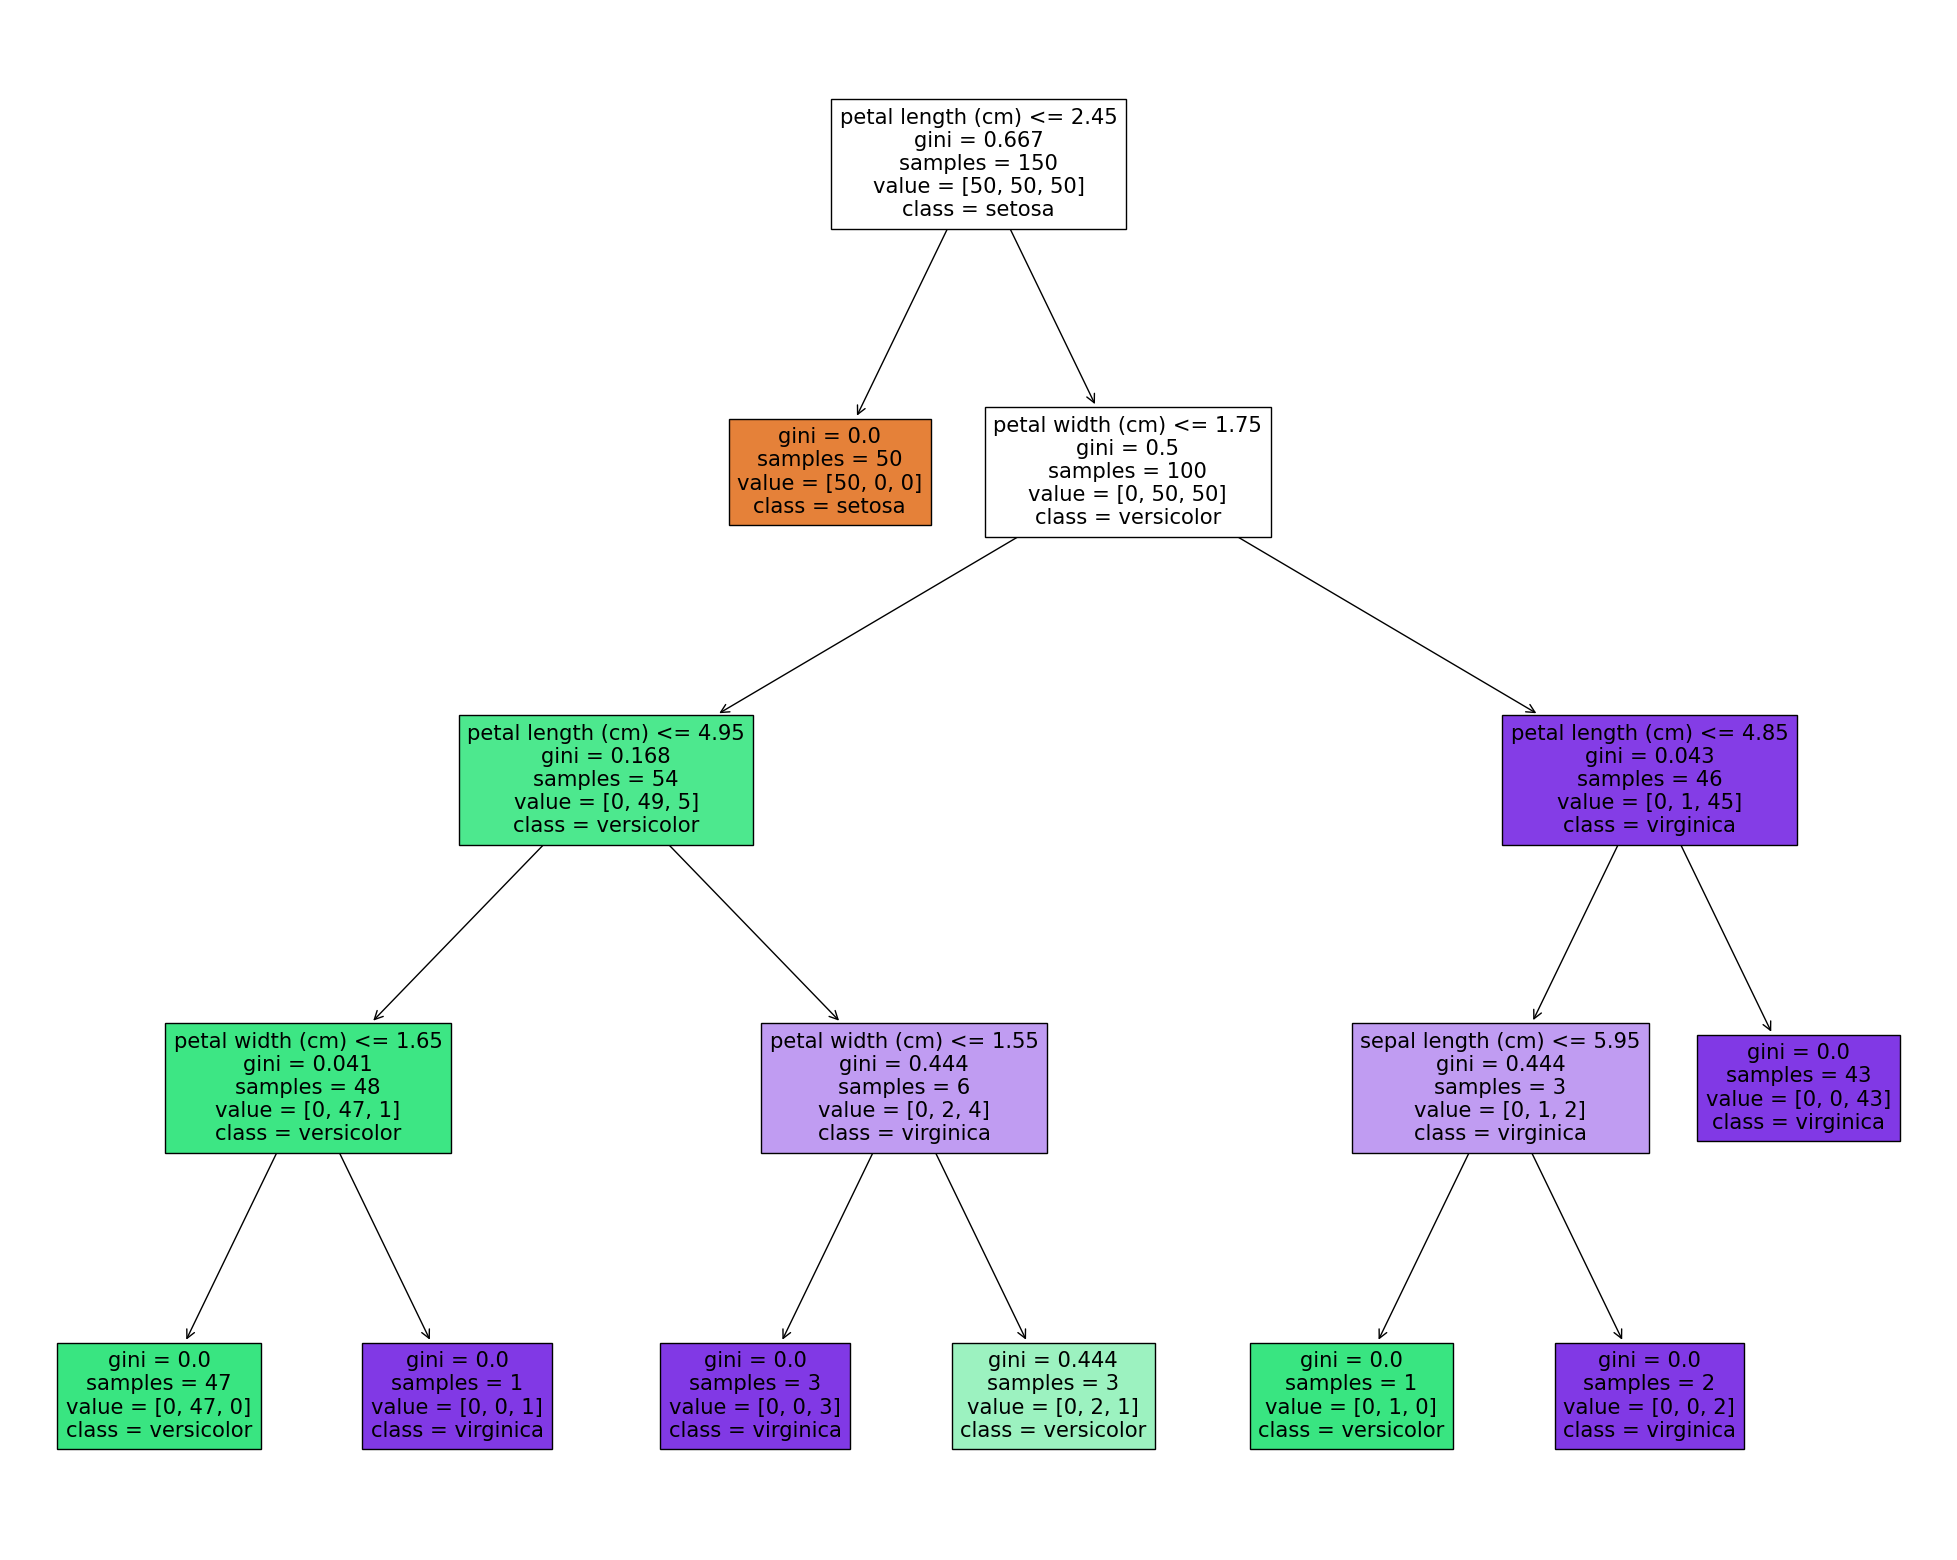

In [25]:
# create a classification tree model 
tree_class = DecisionTreeClassifier(random_state=1234,
                                   max_depth= 4,
                                   min_samples_leaf = 1)

# fitting the model using X and y (similar to previous models)
tree_class.fit(X, y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_class, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

## 2) Regression trees

In this example, we will reproduce the example from the course, on Hitters data. It is a regression problem (we are trying to predict the salary of baseball players).

Here is a description of each variable:

- AtBat: Number of times in the 1986 batting position.
- Hits: Number of successful at-bats in 1986
- HmRun: Number of *home runs* in 1986
- Runs: Number of *runs* in 1986
- RBI: Number of *runs batted in* in 1986
- Walks: Number of *walks* in 1986
- Years: Number of years in the major league
- CAtBat: Number of times in the batting position (career)
- CHits: Number of successful at bats (career)
- CHmRun: Number of *home runs* (career)
- CRuns: Number of *runs* (career)
- CRBI: Number of *runs batted in* (career)
- CWalks: Number of *walks* (career)
- League: League of the player at the end of 1986
- Division: Player's division at the end of 1986
- PutOuts: Number of *put outs* in 1986
- Assists: Number of *assists* in 1986
- Errors: Number of errors in 1986
- Salary: Annual salary at the beginning of 1987 (in thousands of dollars)
- NewLeague: Player's league at the beginning of 1987

#### Data loading and preparation

The `read_csv` function of the pandas library can also load data online via the url of the page where the data is stored.

See this GitHub page for example: https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Data/Hitters.csv

In [2]:
# load data Hitters
df = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Hitters.csv", index_col=0)

# print the first rows
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


We can observe the presence of qualitative variables (League, Division, NewLeague), which will have to be recoded. We also notice the presence of missing data in the Salary column (which corresponds to the variable to explain). We will remove these observations (rows) later.

In [5]:
# some statistics
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


The `dropna` function of pandas, allows to delete observations (rows) in a DataFrame that contain a missing value on at least one variable (column). Here, we display the dimensions of the dataset, before and after deleting the observations with missing data.

In [6]:
# dimensions before removing the na
print(df.shape)

# remove the na 
df = df.dropna()

# new dimensions
print(df.shape)

(263, 20)
(263, 20)


Now let's move on to the processing of categorical data. The Scikit-Learn library offers two ways to recode categorical variables:

- [One-Hot-Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) or full disjunctive encoding

- [Ordinal Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) for ordinal variables

Here we use the `OrdinalEncoder` function, another solution could have been to use the `get_dummies` function of the pandas library, which allows to perform a complete disjunctive coding (not adapted in our case).

The idea is to isolate the categorical variables in a new DataFrame, recode them, and replace them in the original dataset. Here is an example:

In [7]:
# isolate qualitative variables
dfBis = df[['League','Division','NewLeague']]

# create an ordinal encoder
enc = OrdinalEncoder()

# apply the encoder to the data
enc.fit(dfBis)

# print the categories detected by the encoder
print(enc.categories_)

# create a new DataFrame containing recoded variables
dfBis = pd.DataFrame(enc.transform(dfBis))

# rename new variables
dfBis = dfBis.rename(columns = {0:"LeagueN", 1:"DivisionW", 2:"NewLeagueN"})

# set the same index as in df
dfBis = dfBis.set_index(df.index)

dfBis.head()

[array(['A', 'N'], dtype=object), array(['E', 'W'], dtype=object), array(['A', 'N'], dtype=object)]


,LeagueN,DivisionW,NewLeagueN
-Alan Ashby,1.0,1.0,1.0
-Alvin Davis,0.0,1.0,0.0
-Andre Dawson,1.0,0.0,1.0
-Andres Galarraga,1.0,0.0,1.0
-Alfredo Griffin,0.0,1.0,0.0


After this step we obtain a new DataFrame that contains the recoded categorical variables, we add it (concatenate) to the initial data set.

In [8]:
# remove qualitative variables
df = df.drop(['League', 'Division', 'NewLeague'], axis = 1)

# add recoded variables
df = pd.concat([df, dfBis], axis = 1)

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,LeagueN,DivisionW,NewLeagueN
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1.0,1.0,1.0
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0.0,1.0,0.0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1.0,0.0,1.0
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1.0,0.0,1.0
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0.0,1.0,0.0


#### Construction of the regression tree

First of all, we isolate `X` and `y`, respectively the explanatory variables and the target variable.

In [9]:
X = df.drop(['Salary'], axis = 1) # drop Salary
y = df['Salary'] # select Salary

print(X.shape)
print(X.columns.values)

print(y.shape)

(263, 19)
['AtBat' 'Hits' 'HmRun' 'Runs' 'RBI' 'Walks' 'Years' 'CAtBat' 'CHits'
 'CHmRun' 'CRuns' 'CRBI' 'CWalks' 'PutOuts' 'Assists' 'Errors' 'LeagueN'
 'DivisionW' 'NewLeagueN']
(263,)


Then, we create training and test samples:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

We start by creating a small tree (depth 2)...

In [11]:
tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

... that we can visualize...

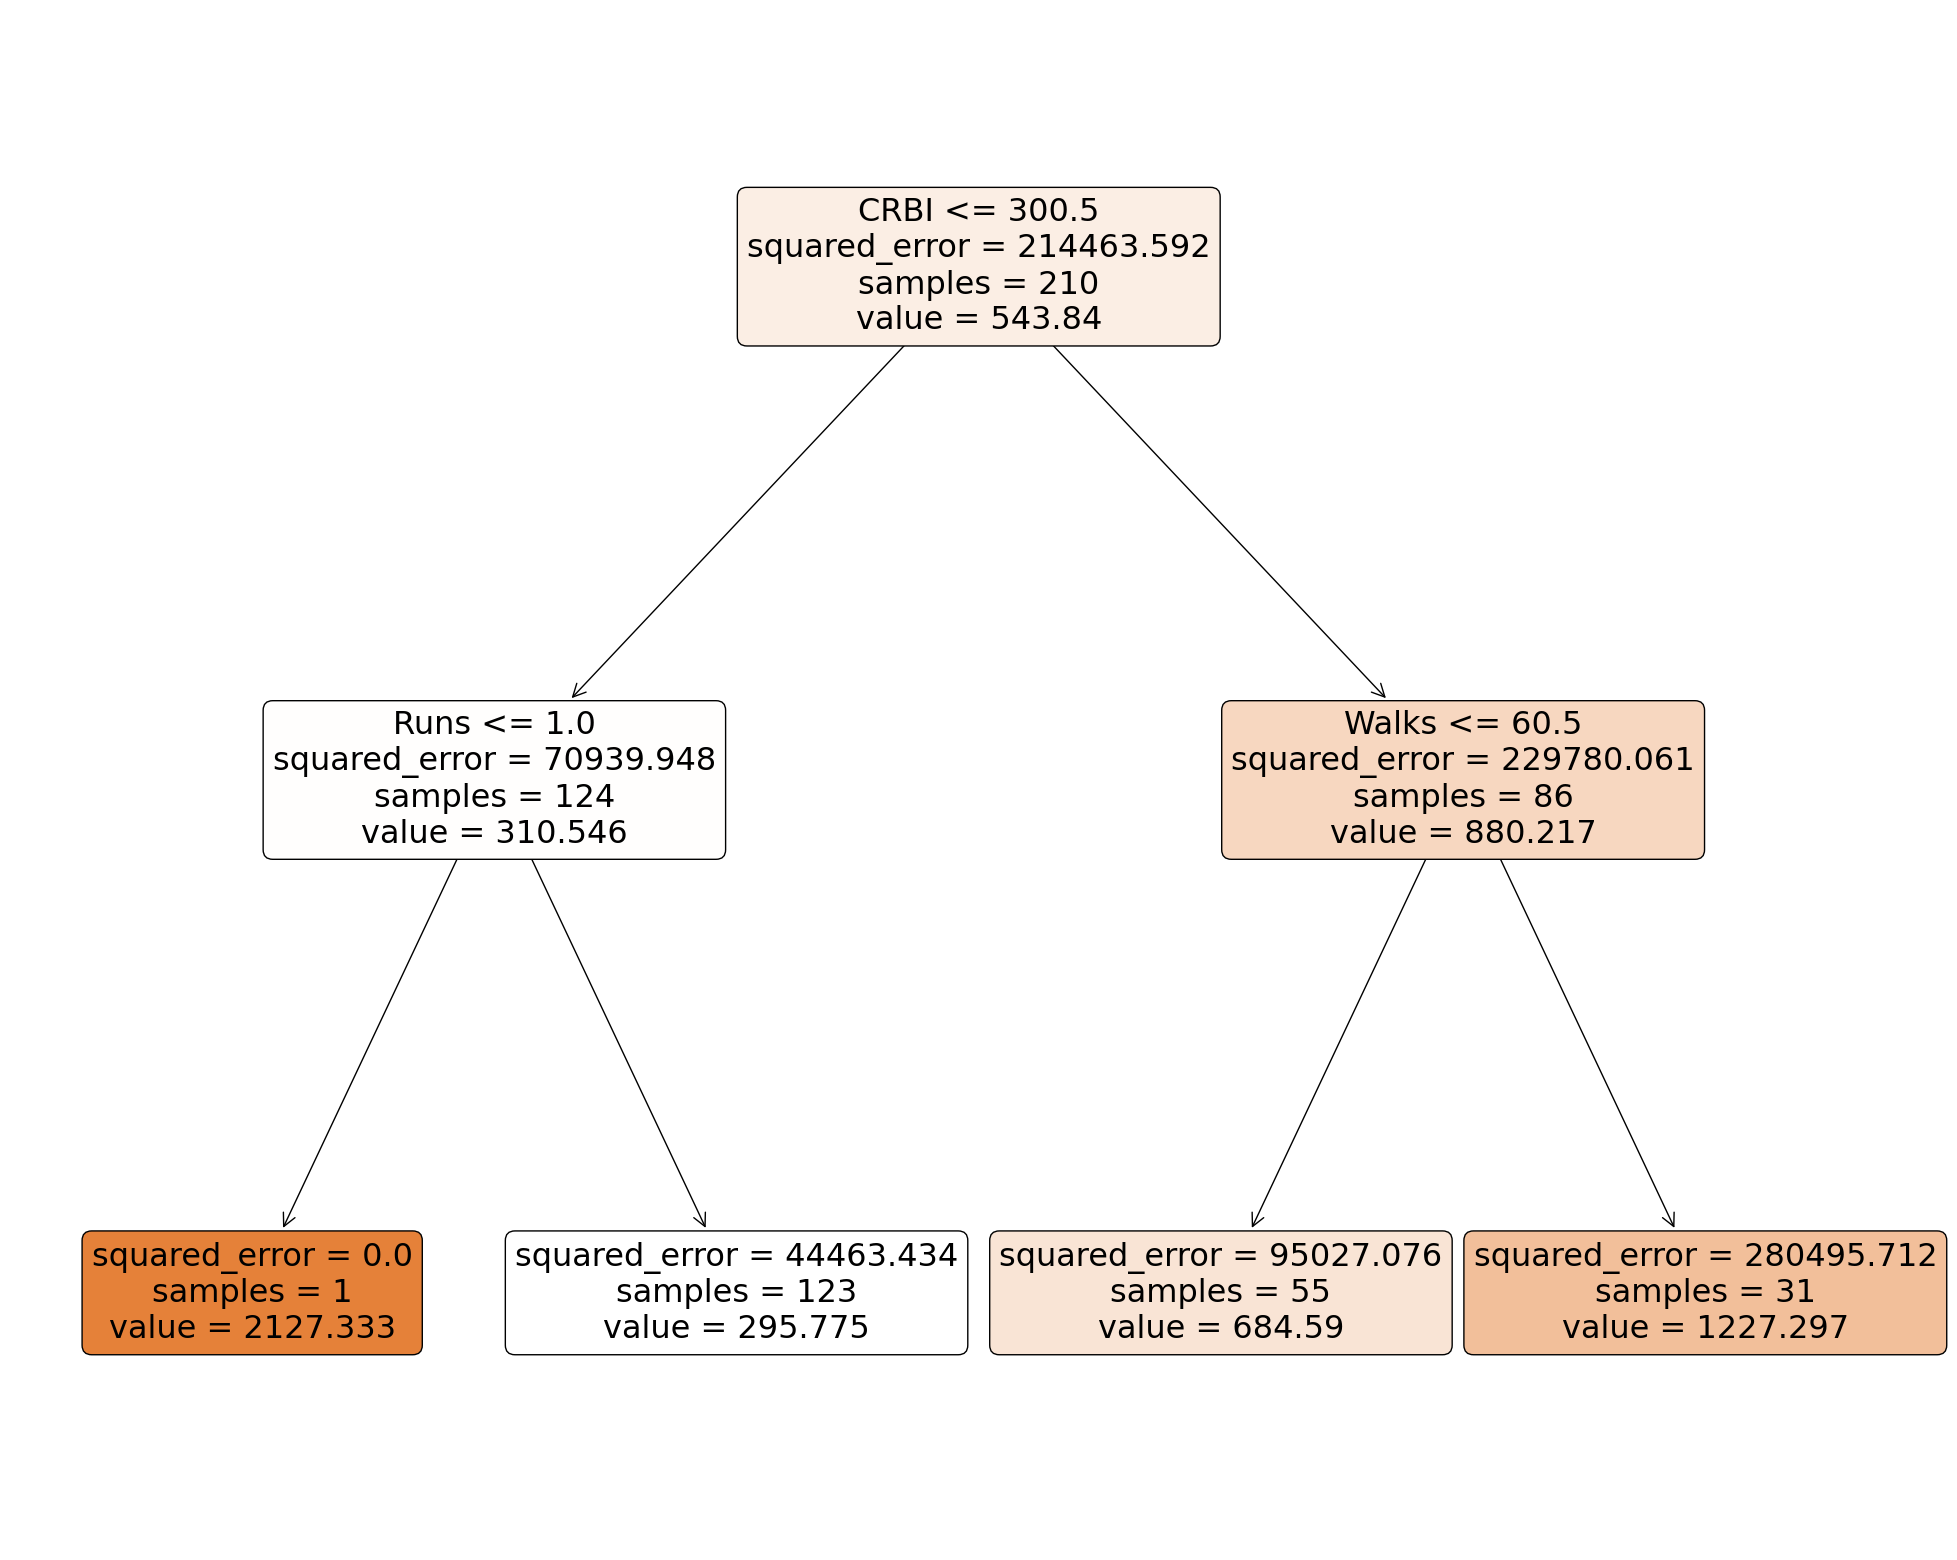

In [12]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_reg, 
                   feature_names=X.columns.values,
                   rounded = True,
                   filled=True)

After studying the tree above, there seems to be an outlier... we remove it from the training sample (of `X` and `y`):

In [13]:
i = np.where(y_train == 2127.333) # outlier detected

X_train = X_train.drop(X_train.index[i]) # remove from X

y_train = y_train.drop(X_train.index[i]) # remove from y

The tree can be built and visualized again.

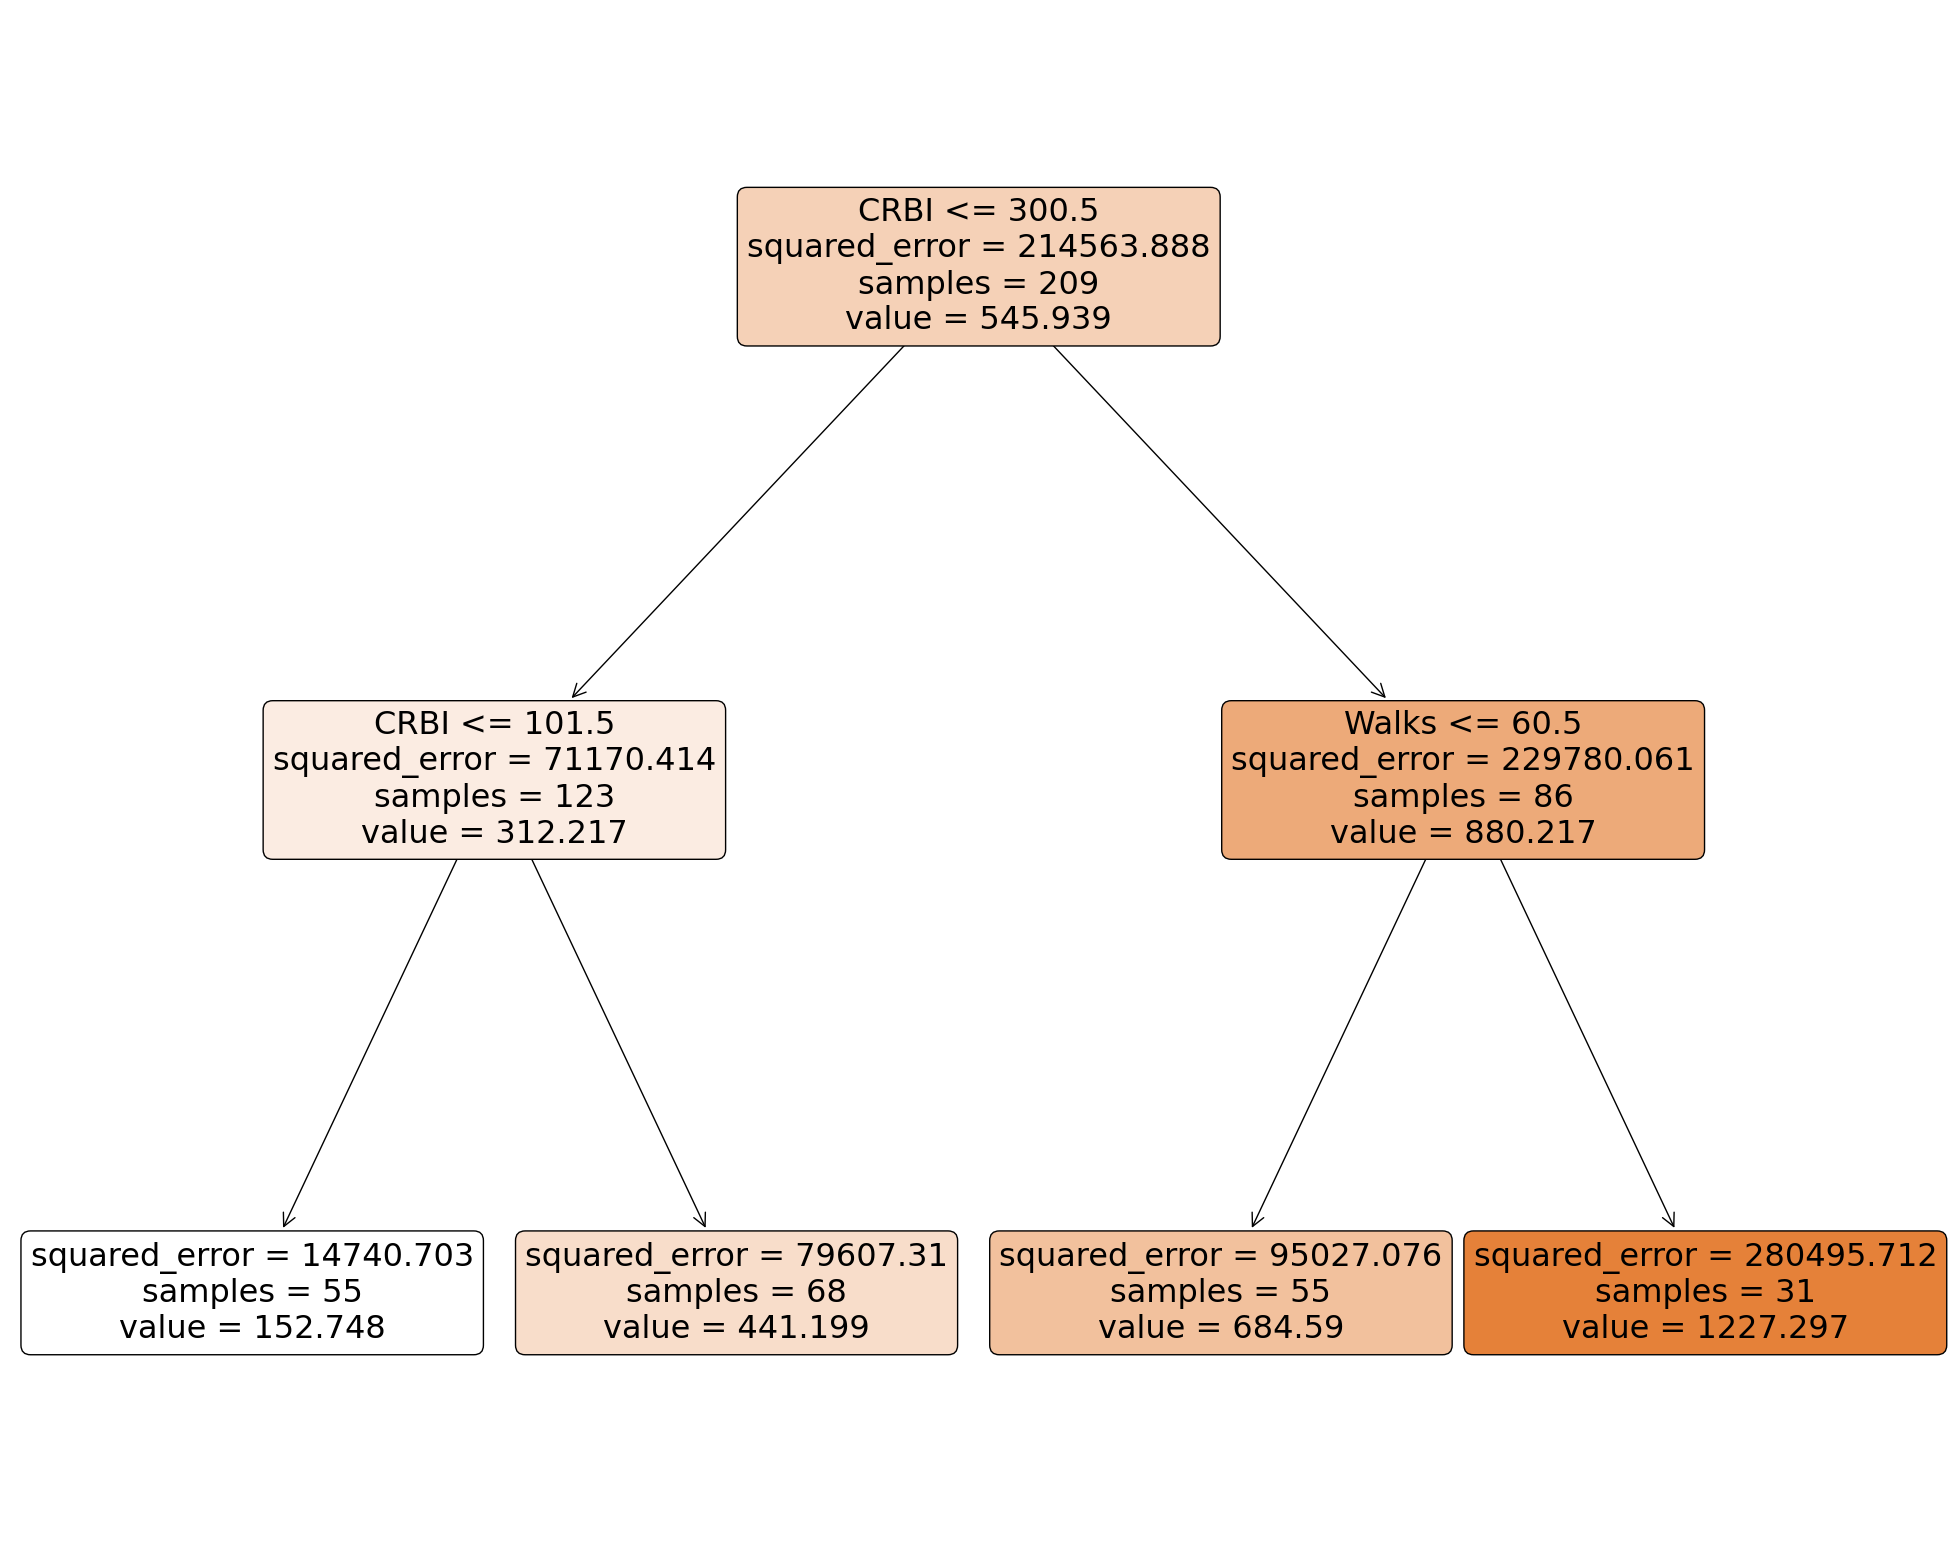

In [14]:
tree_reg.fit(X_train,y_train)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_reg, 
                   feature_names=X.columns.values,
                   rounded = True,
                   filled=True)

We can compute the learning error (we will use the MSE metric, with the `mean_squared_error` function):

In [59]:
# Compute predictions using the training sample
y_train_pred = tree_reg.predict(X_train)

# Compute MSE
tree_mse = mean_squared_error(y_train, y_train_pred)
print(tree_mse)

96391.82755383335


What happens if we increase the depth of the tree?

In [60]:
for depth in range(2,16):
    tree_reg = DecisionTreeRegressor(max_depth = depth)
    tree_reg.fit(X_train,y_train)
    # compute predictions on training set
    y_train_pred = tree_reg.predict(X_train)
    # compute MSE
    tree_mse = mean_squared_error(y_train, y_train_pred)
   
    # compute predictions on test set
    y_test_pred = tree_reg.predict(X_test)
    # compute MSE
    tree_mse_test = mean_squared_error(y_test, y_test_pred)
    print("depth", depth, " - MSE:", tree_mse,  " - MSE (test):", tree_mse_test)    

depth 2  - MSE: 96391.82755383335  - MSE (test): 76452.48774236652
depth 3  - MSE: 68671.82054615281  - MSE (test): 74032.58587288744
depth 4  - MSE: 47234.44897438571  - MSE (test): 50043.00025507758
depth 5  - MSE: 32391.396593603095  - MSE (test): 52924.20429358489
depth 6  - MSE: 17259.979469952166  - MSE (test): 76920.68550844926
depth 7  - MSE: 10660.22196358391  - MSE (test): 73979.66189551722
depth 8  - MSE: 7592.48959237768  - MSE (test): 91180.27181906307
depth 9  - MSE: 5108.553946844185  - MSE (test): 80838.09633826467
depth 10  - MSE: 2027.414735873704  - MSE (test): 74148.13836473686
depth 11  - MSE: 1019.8616214590542  - MSE (test): 83353.97551341874
depth 12  - MSE: 260.36018942629306  - MSE (test): 87267.81969020335
depth 13  - MSE: 82.07530303070175  - MSE (test): 97427.39768606839
depth 14  - MSE: 4.666695906698574  - MSE (test): 107257.60160379246
depth 15  - MSE: 0.0  - MSE (test): 94310.228239


## 3) Evaluation using $K$-fold cross validation

As we have seen in the previous sessions, we must first choose an adequate metric to evaluate our model. Here, we are in a regression problem, we will choose the MSE (reminder: we consider other metrics in classification, see the notebook on logistic regression).

Let's start by evaluating the model for a given depth.

In [61]:
tree_reg = DecisionTreeRegressor(max_depth = 2) # create a regression tree model
tree_reg.fit(X_train,y_train) # growing the tree using the training sample

scores = -cross_val_score(tree_reg, X_train, y_train, 
                         scoring = "neg_mean_squared_error", # "negative mse"
                        cv = 10) # number of folds in the K-fold CV

print(np.mean(scores)) 

142268.6180883203


## 4) Tuning the model

The depth of the tree (`max_depth`) [is not the only hyperparameter](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) that can be controlled for tree construction (and influence prediction performance). For example,

- `min_samples_split`: the minimum number of obervations required for splitting a node
- `min_samples_leaf`: the minimum number of observations needed to form a leaf of the tree

We have seen that it is quite easy to vary the value of a hyperparameter (using a loop for example) and to compute the validation error associated to each value.

A solution to "tune" several hyperparameters would be to test several combinations of values (for example `max_depth = 4, min_sample_split = 2`) and to compute the validation error associated to each combination... but this would quickly become tedious...

Instead, we can use the `GridSearchCV` function, provided for this purpose. In the example below, we will test $9\times 5 = 45$ different combinations.

In [15]:
# parameter grid
param_grid = {'max_depth': range(2,10), 
              'min_samples_split': [2,4,6,8,10]
             }

tree_reg = DecisionTreeRegressor(random_state=0) # create a regression tree
# Note: we could put a pipeline here

grid_search = GridSearchCV(tree_reg, # model
                          param_grid, # parameter grid
                          scoring = "neg_mean_squared_error", # metric to evaluate
                          return_train_score=True,
                          cv = 3) 



In [16]:
len(range(2,10))

8

To estimate the model by "Grid Search CV", we use the function `fit`.

In [17]:
grid_search.fit(X_train, y_train) # CV using all parameter combinations in the grid

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': range(2, 10),
                         'min_samples_split': [2, 4, 6, 8, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

How to identify the best hyperparameters ?

In [18]:
grid_search.best_params_ 

{'max_depth': 6, 'min_samples_split': 8}

One can extract the best model.

In [19]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_split=8, random_state=0)

How to get the detailed results of the grid search CV ?

In [67]:
cvres = grid_search.cv_results_

We can look at the training error for each combination of hyperparameters.

In [68]:
print(np.c_[cvres['mean_train_score'], cvres["params"]])

[[-92409.7127286839 {'max_depth': 2, 'min_samples_split': 2}]
 [-92409.7127286839 {'max_depth': 2, 'min_samples_split': 4}]
 [-92409.7127286839 {'max_depth': 2, 'min_samples_split': 6}]
 [-92409.7127286839 {'max_depth': 2, 'min_samples_split': 8}]
 [-92409.7127286839 {'max_depth': 2, 'min_samples_split': 10}]
 [-56438.971922931094 {'max_depth': 3, 'min_samples_split': 2}]
 [-56438.971922931094 {'max_depth': 3, 'min_samples_split': 4}]
 [-56438.971922931094 {'max_depth': 3, 'min_samples_split': 6}]
 [-56438.971922931094 {'max_depth': 3, 'min_samples_split': 8}]
 [-61920.34762293229 {'max_depth': 3, 'min_samples_split': 10}]
 [-33639.9178077102 {'max_depth': 4, 'min_samples_split': 2}]
 [-36397.63452580252 {'max_depth': 4, 'min_samples_split': 4}]
 [-37505.08341444601 {'max_depth': 4, 'min_samples_split': 6}]
 [-37952.65084621488 {'max_depth': 4, 'min_samples_split': 8}]
 [-43434.026546216075 {'max_depth': 4, 'min_samples_split': 10}]
 [-17859.20998652082 {'max_depth': 5, 'min_samples_sp

and the validation error !

In [69]:
print(np.c_[cvres['mean_test_score'], cvres["params"]])

[[-140160.11209799626 {'max_depth': 2, 'min_samples_split': 2}]
 [-140160.11209799626 {'max_depth': 2, 'min_samples_split': 4}]
 [-140160.11209799626 {'max_depth': 2, 'min_samples_split': 6}]
 [-140160.11209799626 {'max_depth': 2, 'min_samples_split': 8}]
 [-140160.11209799626 {'max_depth': 2, 'min_samples_split': 10}]
 [-127741.80117757648 {'max_depth': 3, 'min_samples_split': 2}]
 [-127741.80117757648 {'max_depth': 3, 'min_samples_split': 4}]
 [-127741.80117757648 {'max_depth': 3, 'min_samples_split': 6}]
 [-127741.80117757648 {'max_depth': 3, 'min_samples_split': 8}]
 [-137939.05451314256 {'max_depth': 3, 'min_samples_split': 10}]
 [-130166.75963597246 {'max_depth': 4, 'min_samples_split': 2}]
 [-137830.4101748415 {'max_depth': 4, 'min_samples_split': 4}]
 [-133720.83071436262 {'max_depth': 4, 'min_samples_split': 6}]
 [-141265.8067465137 {'max_depth': 4, 'min_samples_split': 8}]
 [-151463.06008207976 {'max_depth': 4, 'min_samples_split': 10}]
 [-141086.61280772815 {'max_depth': 5, 

## Results

We will now predict the value of $y$ for the observations of our test sample, and calculate the test error (or error of generalization).

In [70]:
# extract the best model
final_model = grid_search.best_estimator_ 

# predict on the test sample
y_pred = final_model.predict(X_test)

In [71]:
print(final_model)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [72]:
mean_squared_error(y_test, y_pred) # test error

61317.15169393232

How to compute variable importance ?

In [21]:
importance = grid_search.best_estimator_.feature_importances_
print(importance)

[0.02521321 0.05264931 0.         0.03830832 0.06830023 0.15996335
 0.         0.0252372  0.01145367 0.         0.         0.5661958
 0.00238253 0.0164592  0.         0.03383718 0.         0.
 0.        ]


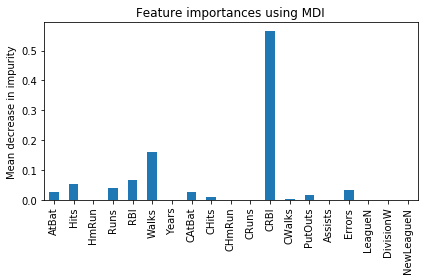

In [74]:
importance = pd.Series(importance, index=X.columns.values)
fig, ax = plt.subplots()
importance.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

We end up displaying the tree from the final model.

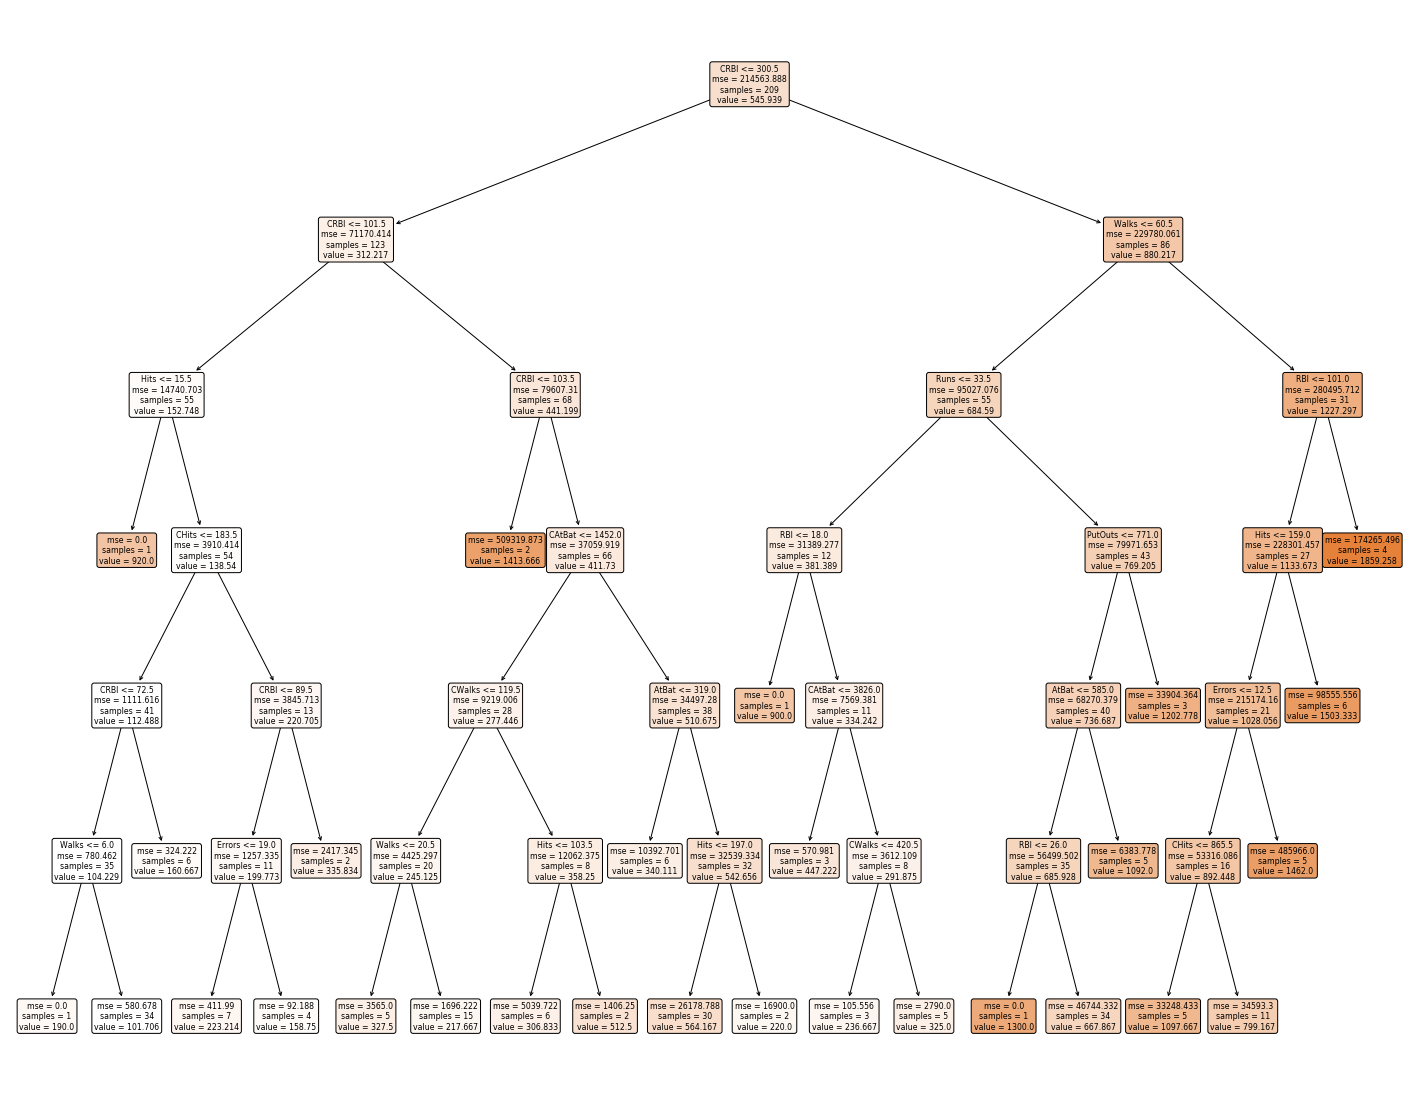

In [75]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(final_model, 
                   feature_names=X.columns.values,
                   rounded = True,
                   filled=True)

## Exercise

Repeat the same procedure using another regression model (e.g. linear or polynomial regression) in the grid search and compare the errors of each model by cross validation.